#### Predicting Estate Value :

EDA

# Importing Table & Librarys :

In [1]:
## For Data Manupulation:
import pandas as pd

## For Scientific Calculation :
import numpy as np

## For Data Visualization :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For Data Warning :
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\gurgaon_10k.csv")
df2 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\hyderabad.csv")
df3 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\kolkata.csv")
df4 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\mumbai.csv")

df = pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df.sample(5)

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,ALT_TAG,PRODUCT_TYPE,PROPERTY_TYPE__U,SECONDARY_AREA,VALUE_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SUPER_AREA,SUPERAREA_UNIT
10395,P68198486,https://mediacdn.99acres.com/media1/20718/17/4...,https://mediacdn.99acres.com/media1/20718/17/4...,S,Vipul greens is one of gurgaon's most sought a...,Residential Apartment,Gurgaon,Sector 48 Gurgaon,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30460,A70281758,NaN,NaN,S,"Book your 2 BHK apartment in Shreeji Aura, Kha...",Residential Apartment,Navi Mumbai,NaN,2.0,1,...,NaN,PSEUDO_LISTING,1.0,46.82 sq.m.,Freehold,2023-07-17 13:41:53,1 month ago,[],NaN,NaN
26672,R71337132,NaN,NaN,S,Looking for a 2 bhk property for sale in kolka...,Residential Apartment,Kolkata East,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23436,S70907358,NaN,NaN,S,This lovely 4 bhk apartment/flat in em bypass ...,Residential Apartment,Kolkata South,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31003,O68391172,NaN,NaN,S,Enjoy a blissful living experience in Runwal B...,Residential Apartment,Central Mumbai suburbs,NaN,2.0,1,...,Runwal Bliss Others,PSEUDO_LISTING,1.0,49.33-75.53 sq.m.,Freehold,2023-04-06 17:52:24,4 months ago,[],NaN,NaN


# Data preliminary information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38502 entries, 0 to 38501
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROP_ID                       38502 non-null  object 
 1   PHOTO_URL                     8864 non-null   object 
 2   MEDIUM_PHOTO_URL              8864 non-null   object 
 3   PREFERENCE                    38502 non-null  object 
 4   DESCRIPTION                   38502 non-null  object 
 5   PROPERTY_TYPE                 38502 non-null  object 
 6   CITY                          38502 non-null  object 
 7   LOCALITY                      10704 non-null  object 
 8   TRANSACT_TYPE                 31988 non-null  float64
 9   OWNTYPE                       38502 non-null  int64  
 10  BEDROOM_NUM                   34948 non-null  float64
 11  BATHROOM_NUM                  10704 non-null  float64
 12  BALCONY_NUM                   28505 non-null  float64
 13  P

In [6]:
df.duplicated().sum()

0

In [4]:
data = pd.DataFrame(df.isna().sum())
data

,0
PROP_ID,0
PHOTO_URL,29638
MEDIUM_PHOTO_URL,29638
PREFERENCE,0
DESCRIPTION,0
...,...
REGISTER_DATE__U,19501
REGISTERED_DAYS,19501
PRIMARY_TAGS,19501
SUPER_AREA,37682


In [7]:
df = df.drop(['SUPERAREA_UNIT','SUPER_AREA','PRIMARY_TAGS','REGISTERED_DAYS','REGISTER_DATE__U',
              'VALUE_LABEL','SECONDARY_AREA','PROPERTY_TYPE__U','PRODUCT_TYPE','ALT_TAG','VERIFIED','PROJ_ID',
              'PROPERTY_NUMBER','RES_COM','CLASS','UPDATE_DATE','POSTING_DATE','SPID','FURNISHING_ATTRIBUTES',
              'QUALITY_SCORE','COMMON_FURNISHING_ATTRIBUTES','SUPER_SQFT','BUILTUP_SQFT','metadata','xid',
              'profile','CONTACT_COMPANY_NAME','THUMBNAIL_IMAGES','PROPERTY_IMAGES','PROP_DETAILS_URL',
              'GROUP_NAME','PD_URL','TOP_USPS','FSL_Data','BROKERAGE','SUPERBUILTUP_SQFT','CARPET_SQFT',
              'BATHROOM_NUM','MEDIUM_PHOTO_URL','PHOTO_URL','LOCALITY','CONTACT_NAME','DEALER_PHOTO_URL',
              'CITY_ID','LOCALITY_WO_CITY','LISTING','FORMATTED','AMENITIES'],axis=1)
#### That all column contain missing values more than 70%.

In [8]:
del df['PRICE_SQFT']  
del df['PRICE_PER_UNIT_AREA'] 
### Price value contains more valuable containts

In [9]:
del df['PRICE']
del df['MAX_PRICE']
df.rename(columns={"MIN_PRICE":'Estate_price'},inplace=True)     ### thats three columns contain samme value

In [10]:
del df['CLASS_HEADING']  ## In Column CLASS_LABEL values are more sorted. 

In [11]:
del df['location']    #### Its Contains only Repeated Values in Column

In [12]:
df = df.drop(['TRANSACT_TYPE','PROP_HEADING','PROP_ID','SOCIETY_NAME','BUILDING_NAME','FORMATTED_LANDMARK_DETAILS','EXPIRY_DATE','REGISTER_DATE','PROP_NAME','BUILDING_ID','MAP_DETAILS'],axis = 1)   
### This Column values are unique in nature so, These values Doesnt improve Model performace.

In [13]:
df.columns

Index(['PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'OWNTYPE',
       'BEDROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'FEATURES', 'Estate_price', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AREA', 'CLASS_LABEL', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT'],
      dtype='object')

In [14]:
df['AGE'].value_counts()
df['AGE']=df['AGE'].astype(object)
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

In [15]:
df['MAX_AREA_SQFT']
df['MIN_AREA_SQFT']      ### these two columns have same values at every row.
del df['MAX_AREA_SQFT']
df.rename(columns={"MIN_AREA_SQFT":"Buildup_Area"},inplace = True)

In [16]:
df['AREA'] = df['AREA'].str.replace(r'\D', '')      ### It indicate area of property
df['AREA']=df['AREA'].astype(int)
df.rename(columns={'AREA':"Property_Area"},inplace = True)

In [17]:
df['FEATURES'] = df['FEATURES'].str.split(',')
df['FEATURES'] = df['FEATURES'].str.len()                     ### This column indicate number of Amenities

In [18]:
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("G","0")   ### G indicate Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("L","0")   ### L indicate Lowest Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("B","0")   ### B indicate Basement.
df['FLOOR_NUM'] = df['FLOOR_NUM'].astype(np.number)

In [19]:
df['BEDROOM_NUM'] = np.nan_to_num(df['BEDROOM_NUM'])
df['BALCONY_NUM'] = np.nan_to_num(df['BALCONY_NUM'])     ### Converting Null Values into zeroes.

In [20]:
df = df.dropna(subset=['Estate_price'])

In [21]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [22]:
df['AGE'] = df['AGE'].map({1: '1-5 Year Old Property', 2: '5-10 Year Old Property', 3: '10+ Year Old Property',5:'Under Construction',6:'0-1 Year Old Property'})
df.tail()
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,1,2.0,0.0,0,0,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


In [23]:
df['FACING'] = df['FACING'].map({1: 'North', 2: 'South', 3: 'East',4:'West',5:'North_East',6:'North_west',7:'South_east',8:'South_west',0:'East'})

In [24]:
df['FURNISH'].value_counts()

4    11596
0     8490
2     6314
1     3305
Name: FURNISH, dtype: int64

In [25]:
df['FURNISH'] = df['FURNISH'].map({1: 'Furnished', 2: 'Unfernished', 0: 'Furnished',4:'Semifurnished'})

In [26]:
df['OWNTYPE'] = df['OWNTYPE'].map({1: 'FreeHold', 2: 'Lease', 3: 'Co_operative_society',4:'Power_attory',0:'FreeHold'})
df.tail()

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,FreeHold,2.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


<Axes: >

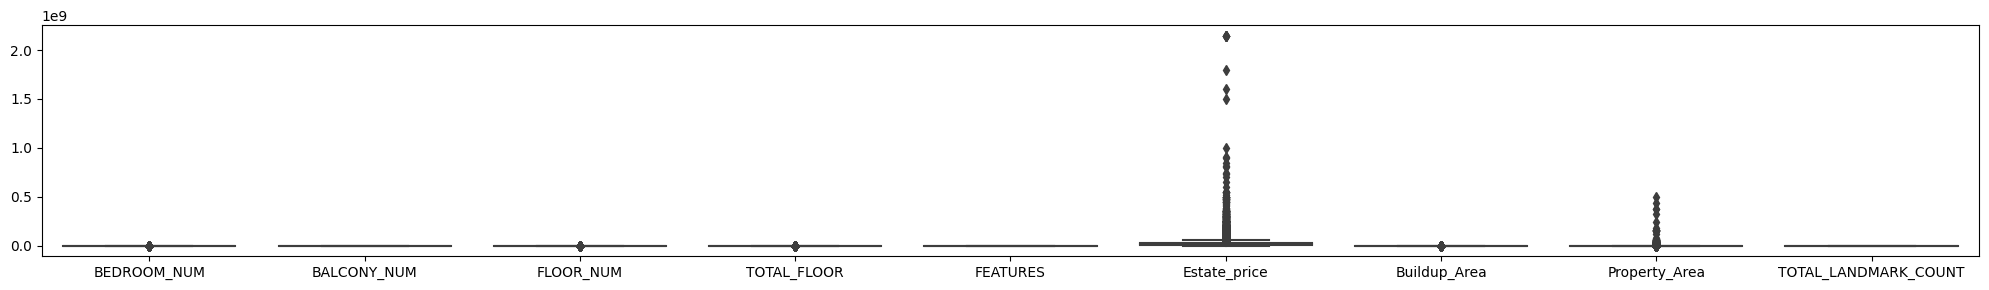

In [27]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [28]:
df['TOTAL_FLOOR'] = df['TOTAL_FLOOR'].fillna(df['TOTAL_FLOOR'].median())
df['FLOOR_NUM'] = df['FLOOR_NUM'].fillna(df['FLOOR_NUM'].median())
df['AGE'] = df['AGE'].fillna(df['AGE'].mode()[0])
df['OWNTYPE'] = df['OWNTYPE'].astype(str)
df['FURNISH'] = df['FURNISH'].astype(str)
df['TOTAL_LANDMARK_COUNT'] = df['TOTAL_LANDMARK_COUNT'].fillna(df['TOTAL_LANDMARK_COUNT'].mean())

In [29]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [30]:
for i in df.select_dtypes(include= np.number):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q1 - 1.5*iqr
    ll = q3 + 1.5*iqr
    df[i].clip(ll,ul,inplace= True)

<Axes: >

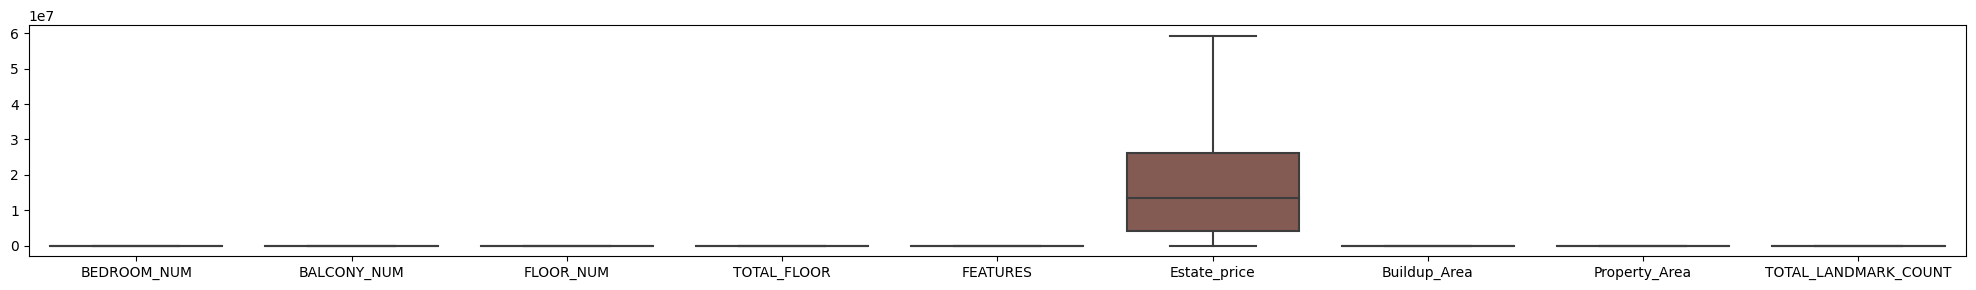

In [31]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [32]:
nlp = df['DESCRIPTION']
df = df.drop(['DESCRIPTION','SECONDARY_TAGS'],axis=1)

In [33]:
df.head()

,PREFERENCE,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,S,Residential Apartment,Gurgaon,FreeHold,4.0,4.0,Semifurnished,North,5-10 Year Old Property,14.0,26.0,18,26300000.0,319.028902,3434,Dealer,10.0
1,S,Residential Apartment,Gurgaon,FreeHold,4.0,3.0,Semifurnished,North,1-5 Year Old Property,7.0,29.0,22,36000000.0,266.631610,2870,Dealer,9.0
2,R,Residential Apartment,Gurgaon,FreeHold,3.0,2.0,Furnished,West,1-5 Year Old Property,7.0,17.0,29,85000.0,181.160850,1950,Dealer,14.0
3,S,Residential Apartment,Gurgaon,FreeHold,3.0,3.0,Semifurnished,East,1-5 Year Old Property,14.0,28.0,17,38500000.0,260.314206,2802,Dealer,8.0
4,R,Residential Apartment,Gurgaon,FreeHold,3.0,4.0,Semifurnished,North_west,1-5 Year Old Property,12.0,27.0,18,40000.0,212.747870,2290,Dealer,14.0


## EDA:

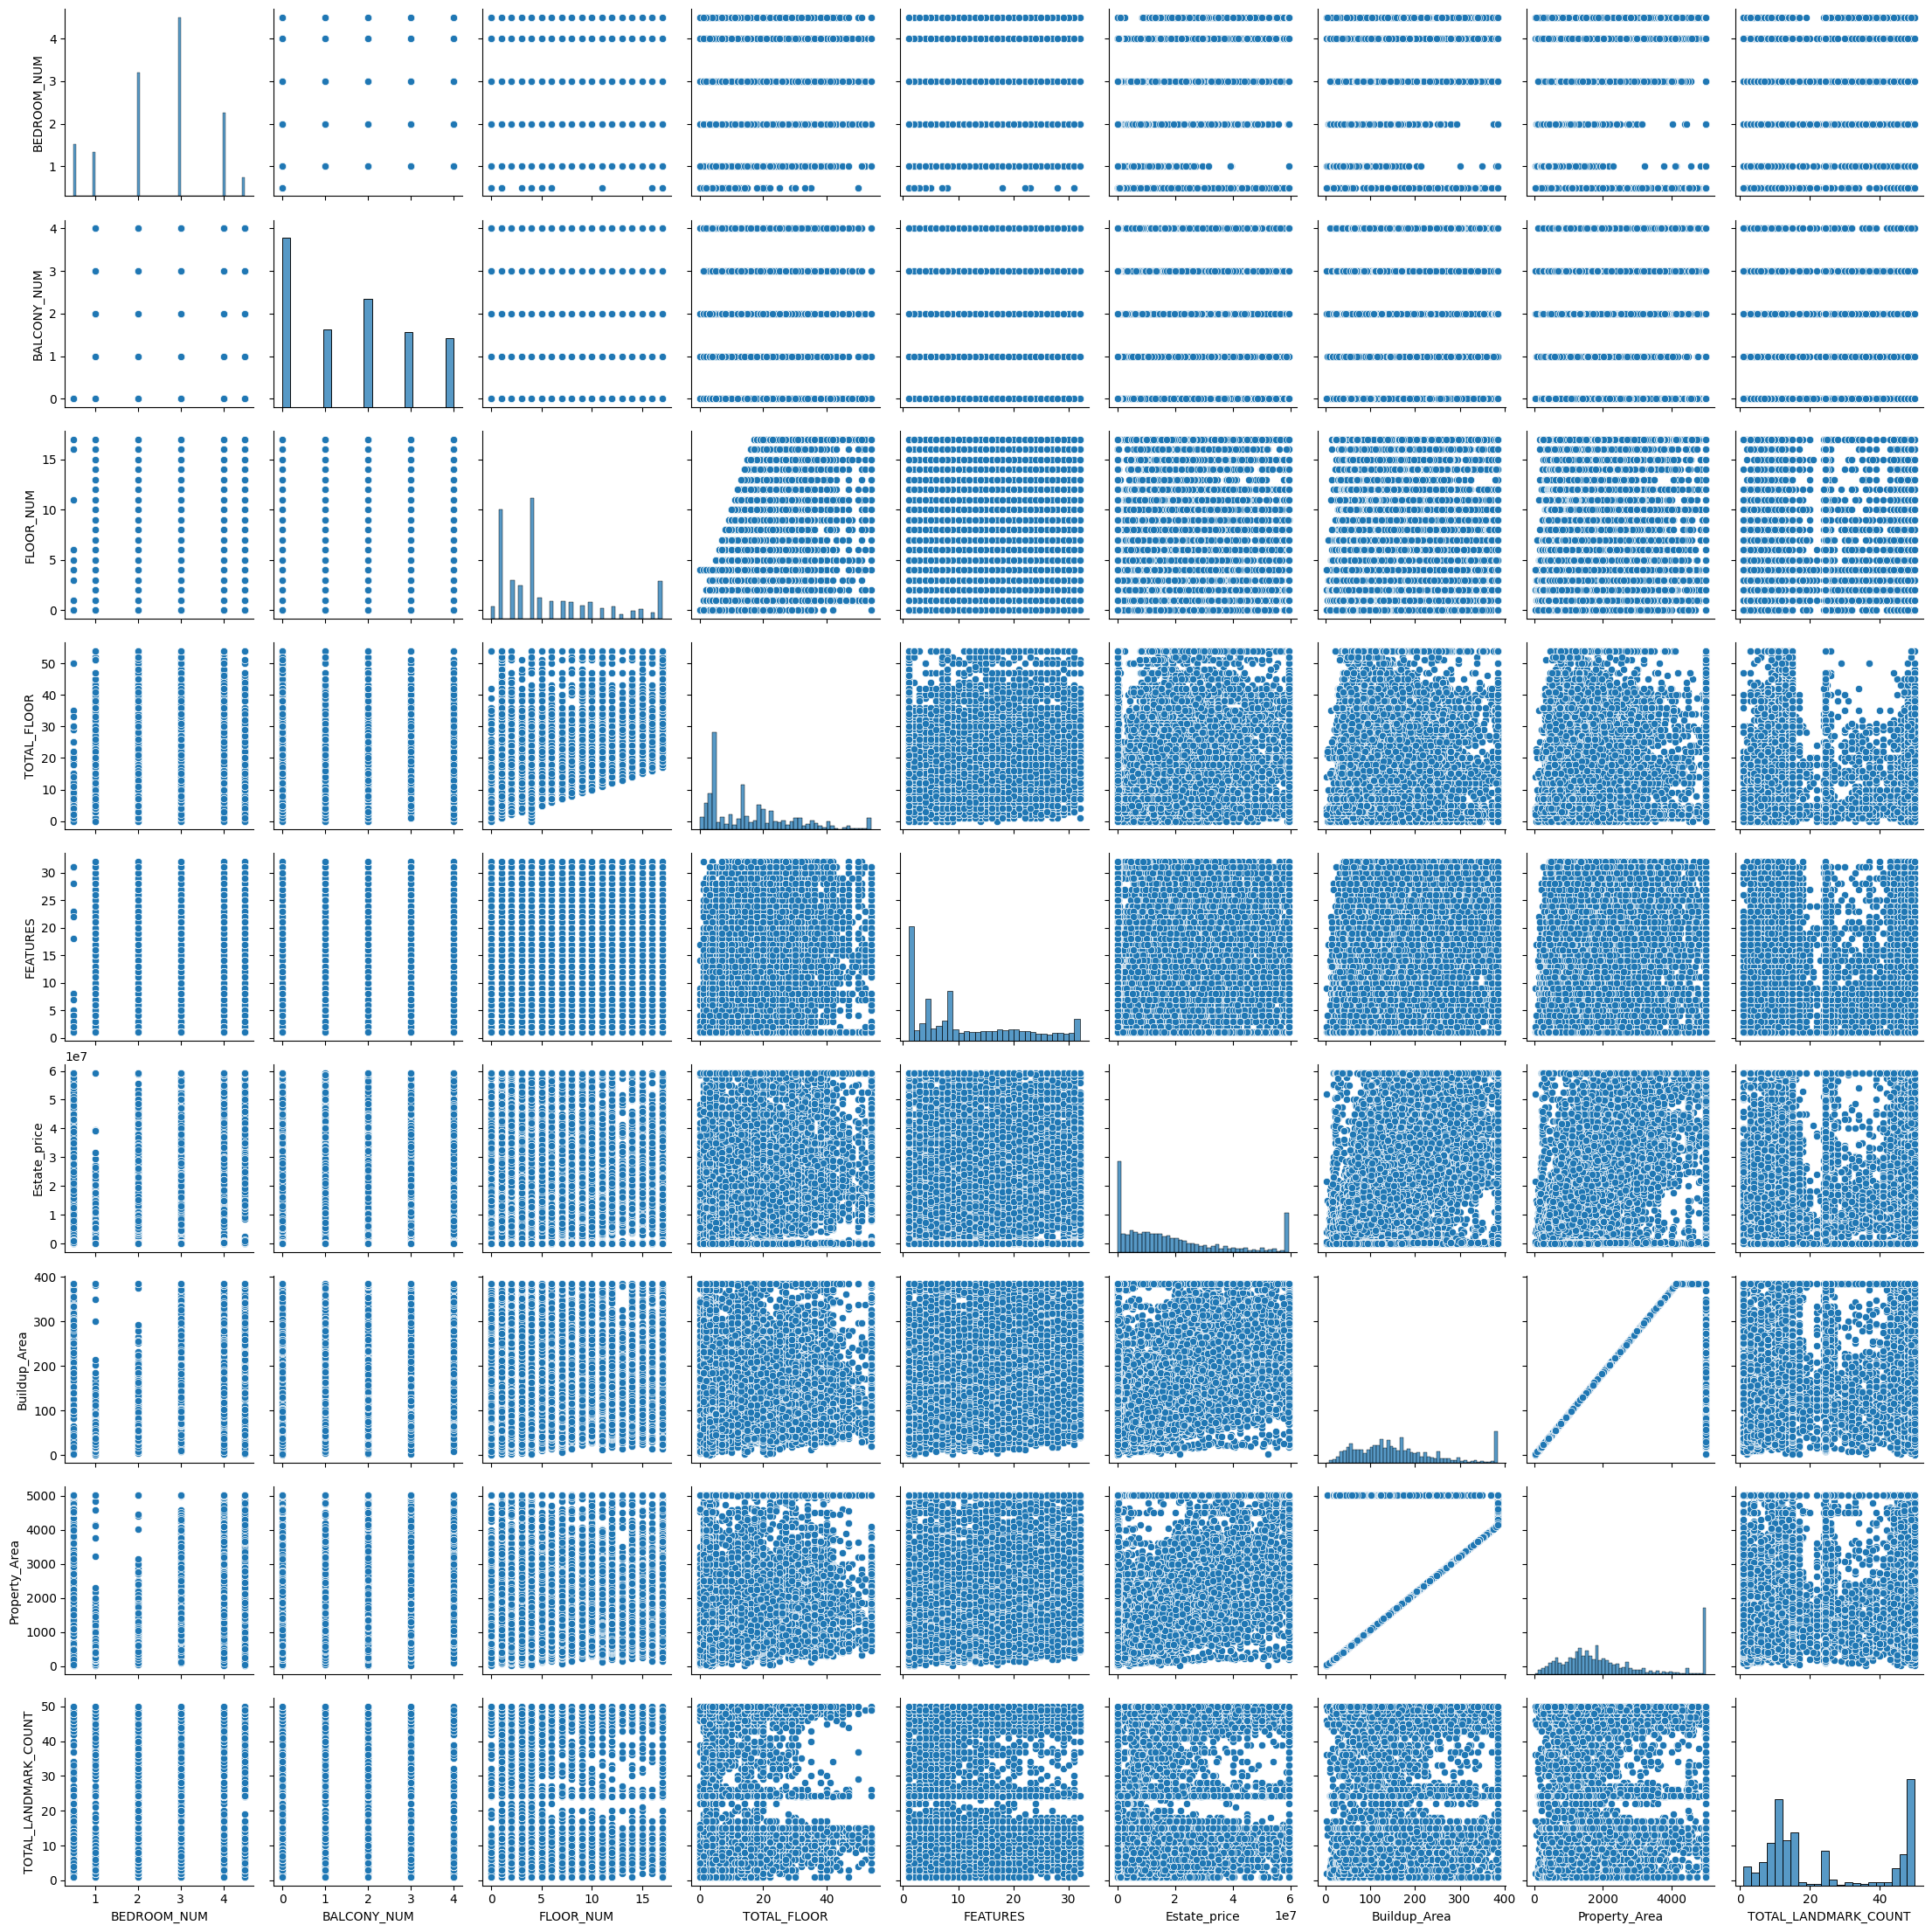

In [34]:
sns.pairplot(df)

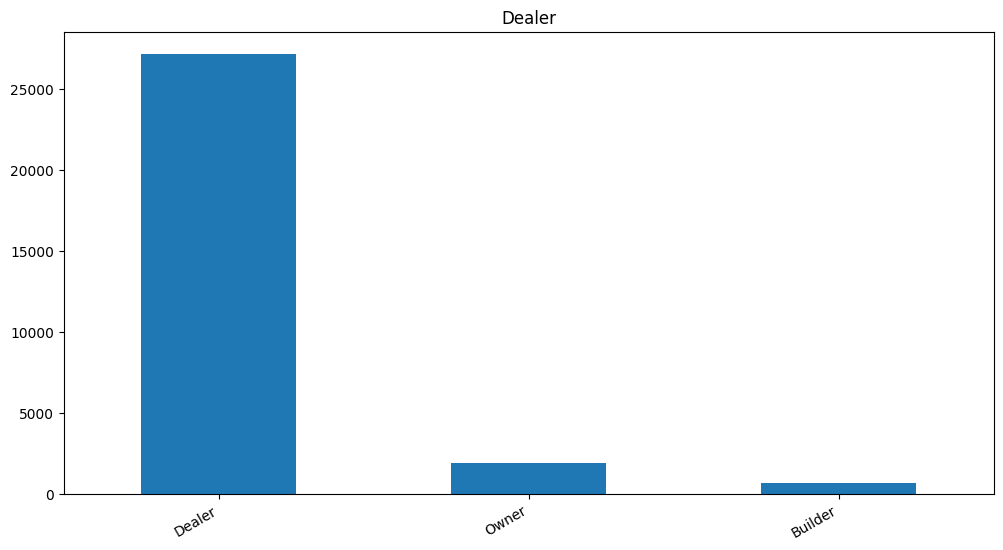

In [48]:
plt.figure(figsize=(12,6))
df['CLASS_LABEL'].value_counts().plot(kind='bar')
plt.title("Dealer")
plt.xticks(rotation = 30,ha='right')
plt.show()  

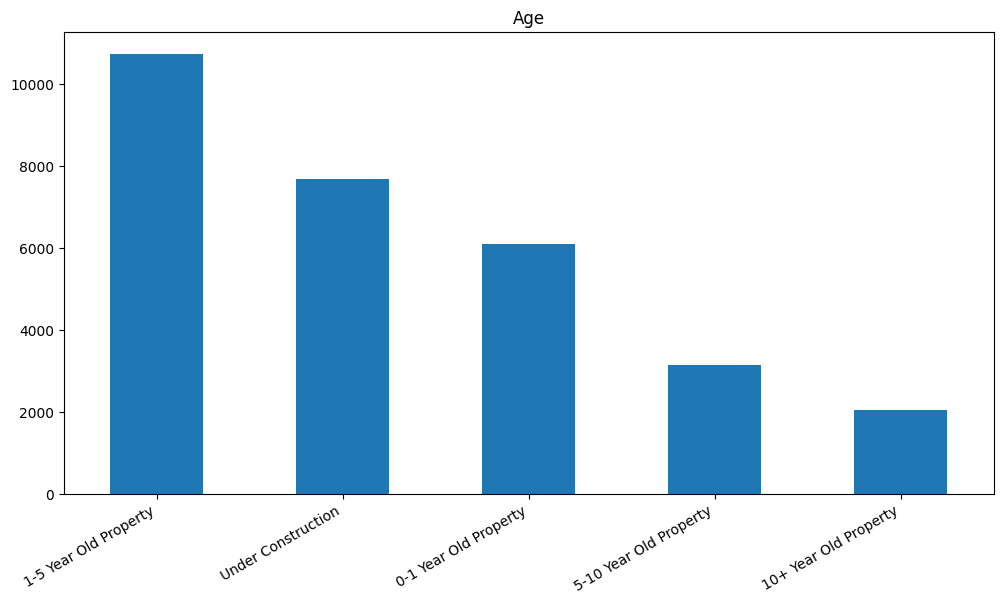

In [49]:
plt.figure(figsize=(12,6))
df['AGE'].value_counts().plot(kind='bar')
plt.title("Age")
plt.xticks(rotation = 30,ha='right')
plt.show() 

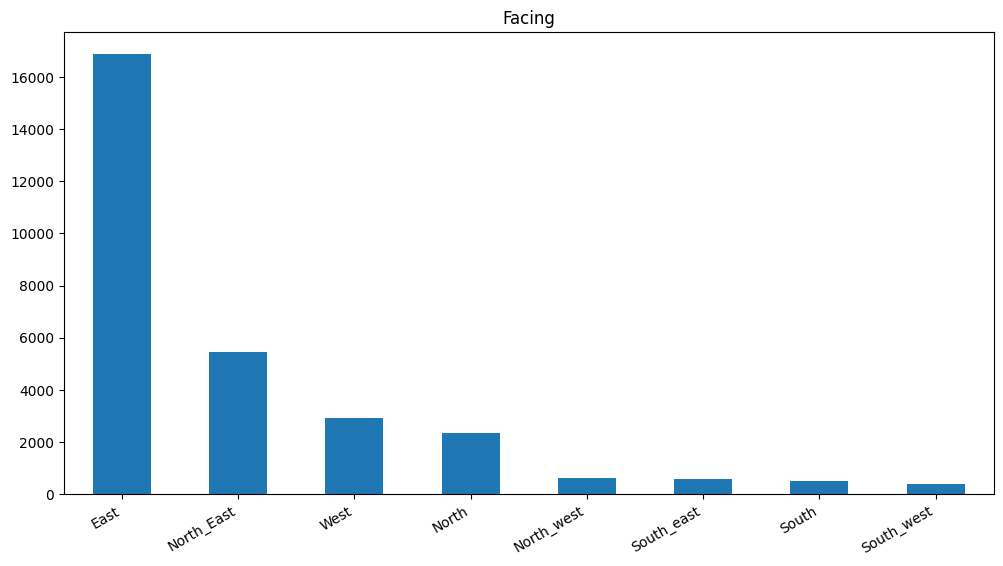

In [51]:
plt.figure(figsize=(12,6))
df['FACING'].value_counts().plot(kind='bar')
plt.title("Facing")
plt.xticks(rotation = 30,ha='right')
plt.show() 

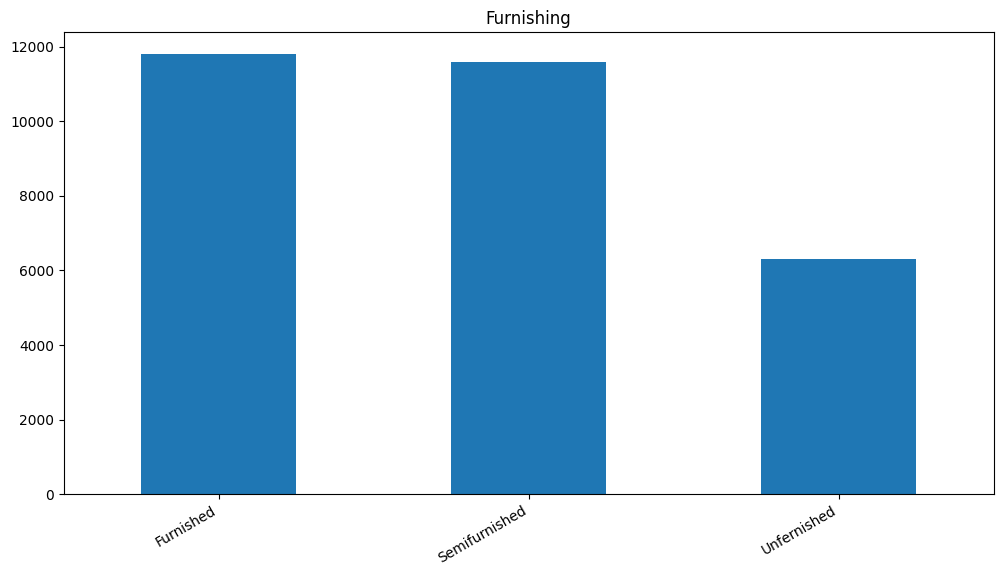

In [52]:
plt.figure(figsize=(12,6))
df['FURNISH'].value_counts().plot(kind='bar')
plt.title("Furnishing")
plt.xticks(rotation = 30,ha='right')
plt.show() 

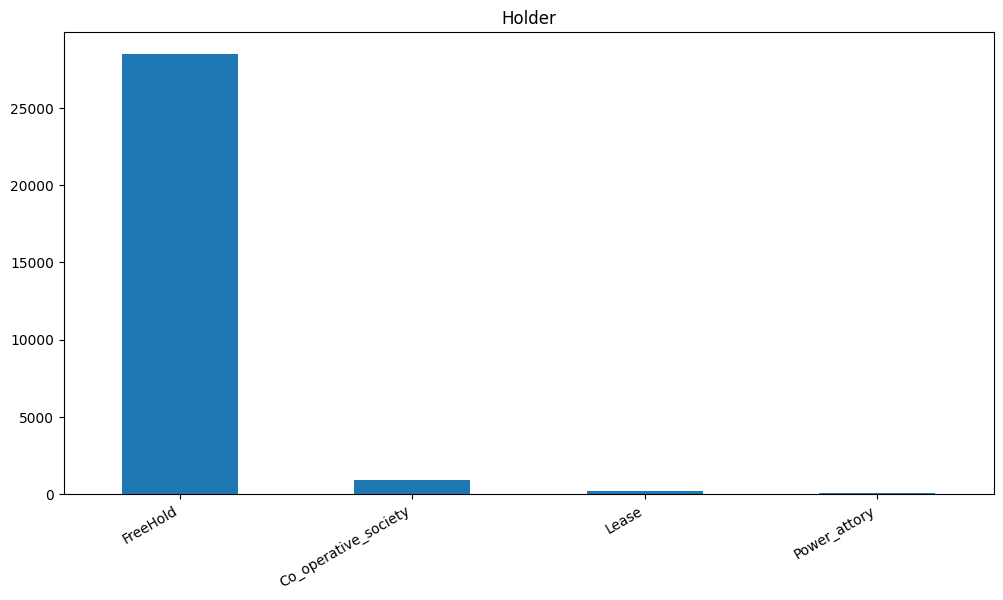

In [54]:
plt.figure(figsize=(12,6))
df['OWNTYPE'].value_counts().plot(kind='bar')
plt.title("Holder")
plt.xticks(rotation = 30,ha='right')
plt.show() 

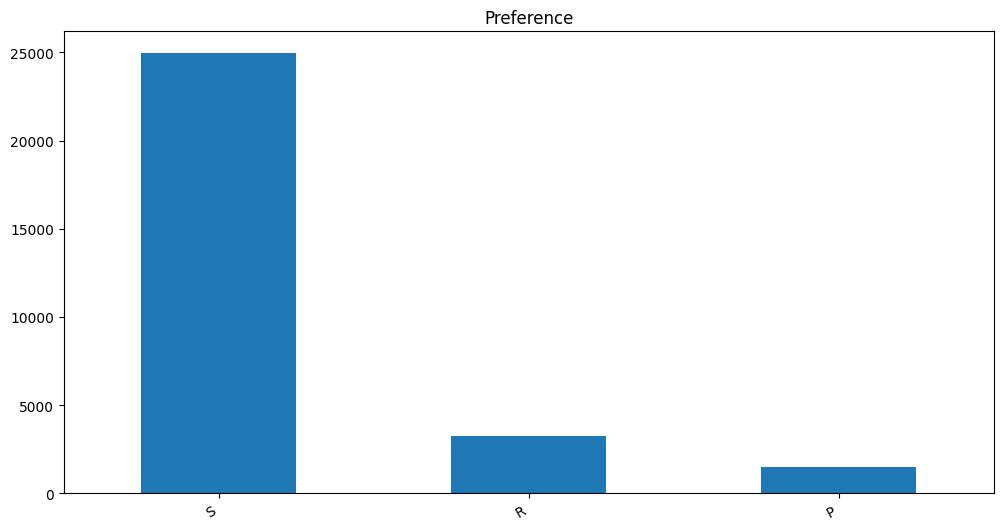

In [56]:
plt.figure(figsize=(12,6))
df['PREFERENCE'].value_counts().plot(kind='bar')
plt.title("Preference")
plt.xticks(rotation = 30,ha='right')
plt.show() 

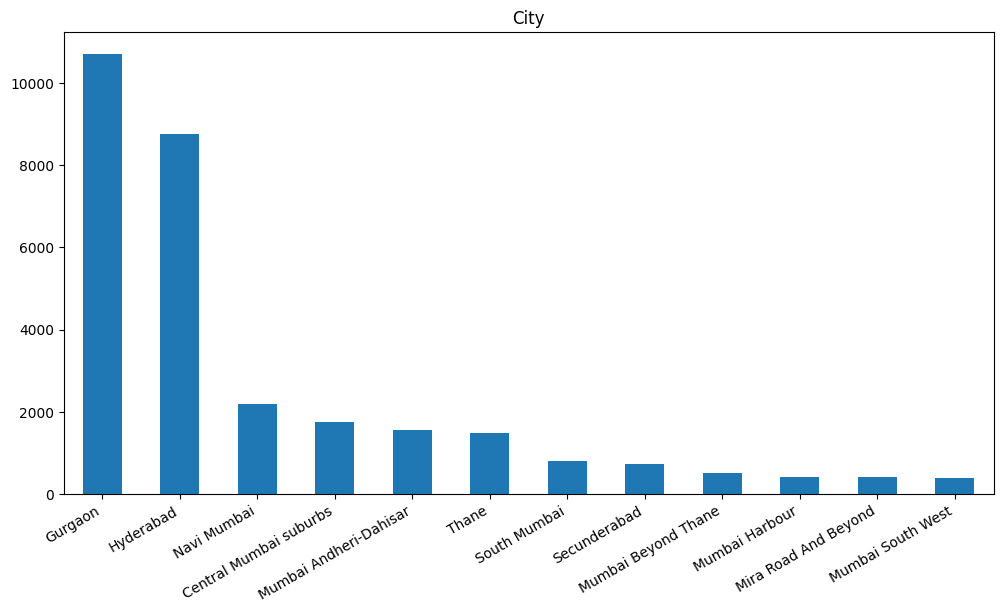

In [66]:
plt.figure(figsize=(12,6))
df['CITY'].value_counts().plot(kind='bar')
plt.title("City")
plt.xticks(rotation = 30,ha='right')
plt.show() 

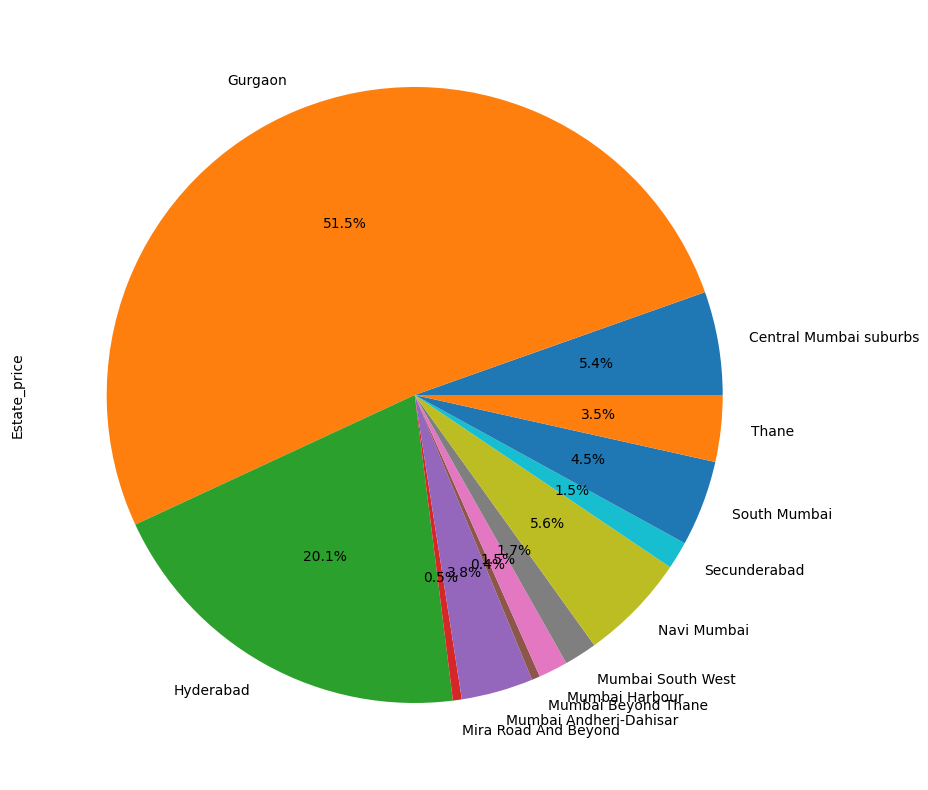

In [63]:
grp = df.groupby("CITY")["Estate_price"].sum()
plt.figure(figsize=(10,10))
grp.plot.pie(autopct = "%0.1f%%")
plt.show()

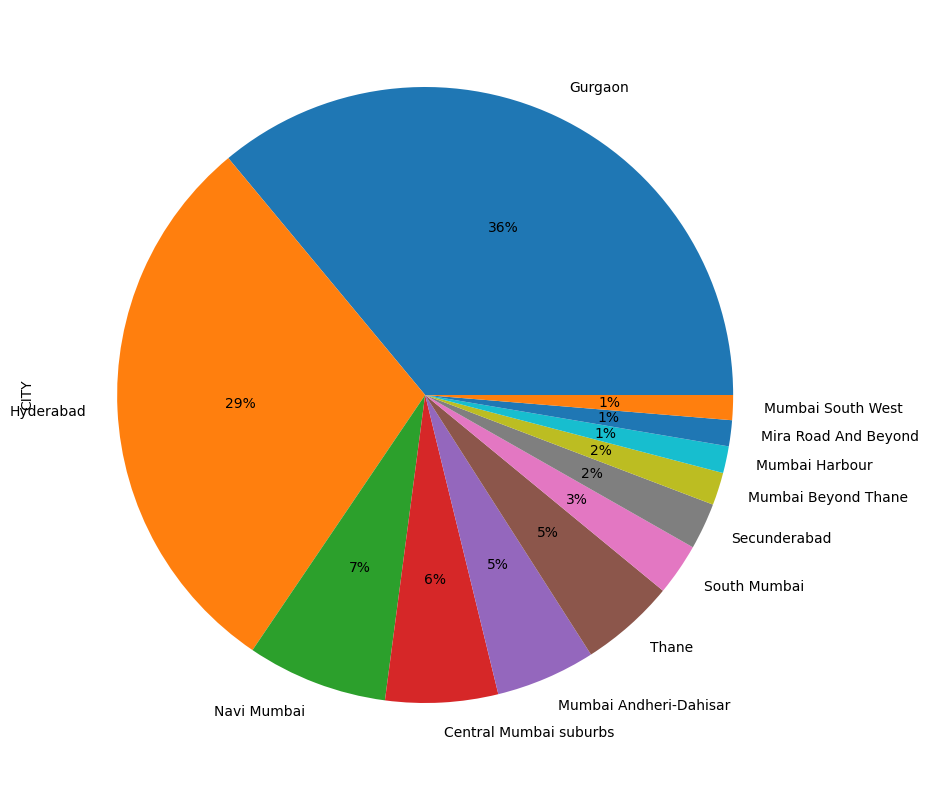

In [65]:
plt.figure(figsize=(10,10))
df.CITY.value_counts().plot.pie(autopct = "%1.f%%")
plt.show()